In [11]:
import scipy.io
import scipy
import numpy as np
import os
import csv
import numpy as np
from hydra import initialize, compose
import json
from typing import List
import mne
import matplotlib.pyplot as plt

In [12]:
meg_filepath = '/work/project/MEG_GOD/GOD_dataset/VideoWatching/preprocess_MEG/sbj01/ID01_HerosVol1-1_id1_MEG_DATAPixx_part2.mat'

In [13]:
data = scipy.io.loadmat(meg_filepath)

MEG_Data = data['F']

MEG_Data.shape  # これはcon fileより1frame多い 1sec単位でセグメントしたのであれば、こっちの方がただしそう？

(203, 871000)

In [4]:
def roi(region)->list:
    with open('../data/GOD/ch_region.json', 'r') as f:
        ch_region_info = json.load(f)
    roi_channels = []
    for reg in region:
        reg_subreg = reg.split('/')
        assert len(reg_subreg) == 2, 'got {}'.format(reg_subreg)
        r = reg_subreg[0]
        s = reg_subreg[1]
        roi_channels += ch_region_info[r][s]
    roi_channels = [r-1 for r in roi_channels]
    print('ROI: ', [reg for reg in region])
    print('channel (-1 is done because matlab starts from 1): ', roi_channels)
    print('num channels: ', len(roi_channels))
    return roi_channels


ROI:  ['occipital/left', 'occipital/right']
channel (-1 is done because matlab starts from 1):  [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
num channels:  22
Creating RawArray with float64 data, n_channels=22, n_times=892000
    Range : 0 ... 891999 =      0.000 ...   891.999 secs
Ready.
NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
/tmp/ipykernel_63040/514756095.py:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mne.viz.plot_raw_psd(raw)


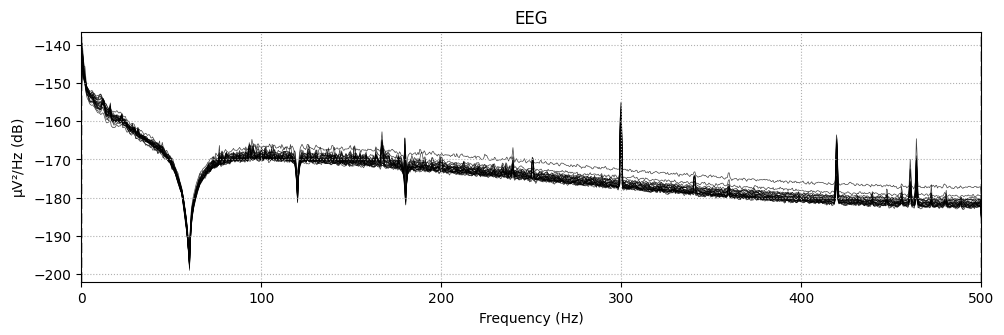

In [5]:
region=[
  'occipital/left',
  'occipital/right'
]
roi_ids = roi(region)

data = MEG_Data[roi_ids,:]
# create raw
info = mne.create_info(
    ch_names=len(roi_ids),
    sfreq=1000,
    ch_types='eeg',
)
raw = mne.io.RawArray(data, info)

mne.viz.plot_raw_psd(raw)
plt.show()

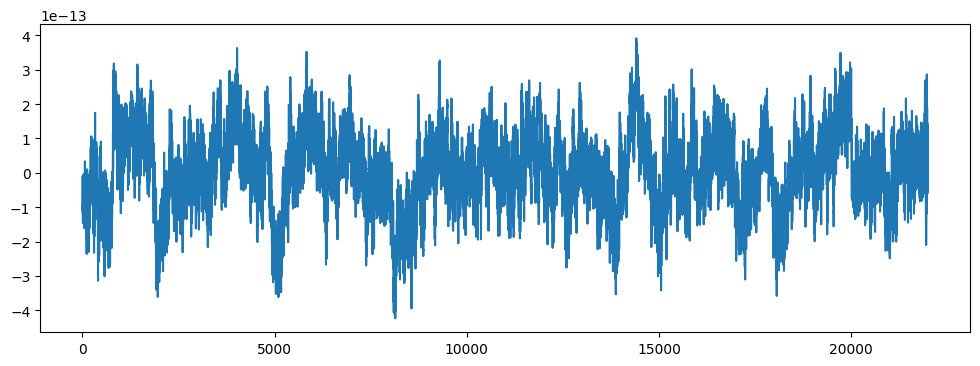

In [6]:
plt.figure(figsize=(12,4))
plt.plot(data[0,200000:222000])
plt.show()

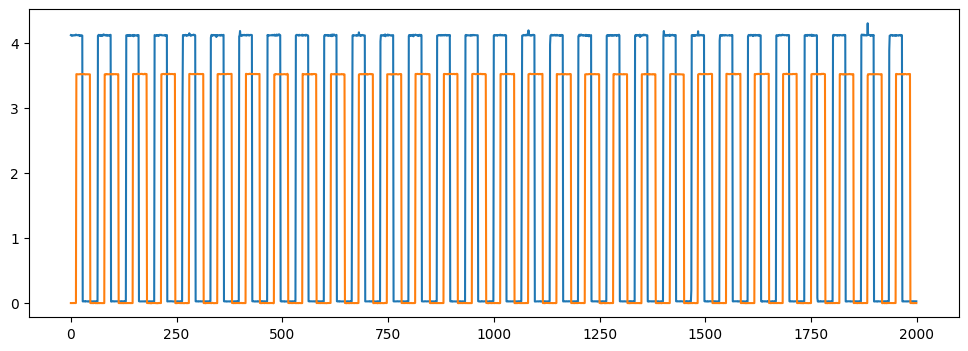

In [7]:
plt.figure(figsize=(12,4))
plt.plot(MEG_Data[160,200000:202000])
plt.plot(MEG_Data[161,200000:202000])
plt.show()

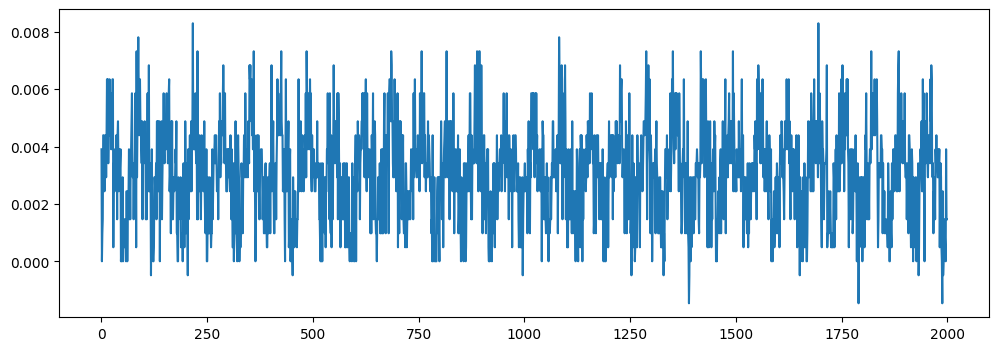

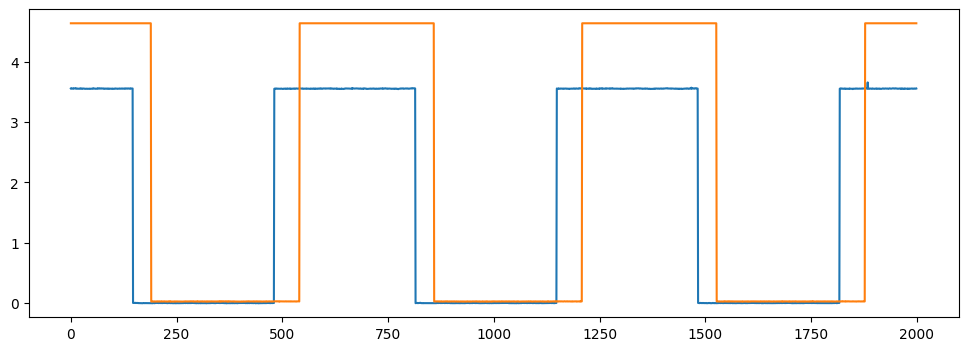

In [8]:
plt.figure(figsize=(12,4))
plt.plot(MEG_Data[163,200000:202000])
# plt.plot(MEG_Data[168,200000:202000])
plt.show()

plt.figure(figsize=(12,4))
plt.plot(MEG_Data[162,200000:202000])
plt.plot(MEG_Data[167,200000:202000])
plt.show()



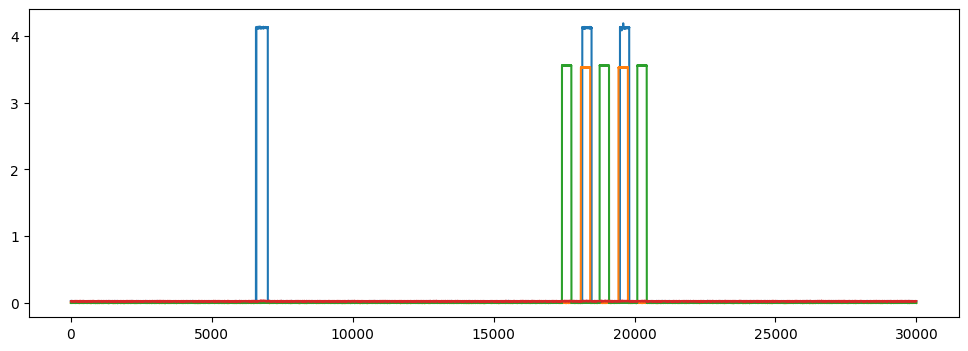

In [9]:
plt.figure(figsize=(12,4))
plt.plot(MEG_Data[160,30000:60000])
plt.plot(MEG_Data[161, 30000:60000])
plt.plot(MEG_Data[162,30000:60000])
plt.plot(MEG_Data[167, 30000:60000])
plt.show()

In [14]:
29.97 * (13*60 + 59)

25144.829999999998